In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install dabl

     |████████████████████████████████| 558 kB 4.3 MB/s 


In [3]:
import pandas as pd
import numpy as np
import dabl as db
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_columns = None
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.simplefilter(action = 'ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/wids/TrainingWiDS2021.csv')
test_data = pd.read_csv('/content/drive/MyDrive/wids/UnlabeledWiDS2021.csv')
sol_temp = pd.read_csv('/content/drive/MyDrive/wids/SolutionTemplateWiDS2021.csv')
data_dic = pd.read_csv('/content/drive/MyDrive/wids/DataDictionaryWiDS2021.csv')


####Training data preview 

In [5]:
train_data.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,1

####Testing data preview

In [6]:
test_data.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,82,admit,Med-Surg ICU,0.015278,0,NaN,2.8,110.0,104.01,0,0,1.9,44.0,1.49,NaN,4.0,6.0,0.0,5.0,97.0,38.0,39.9,0,54.0,NaN,NaN,NaN,NaN,31.0,130.0,36.4,NaN,0,5.4,NaN,NaN,104.0,40.0,104.0,40.0,66.0,38.0,NaN,NaN,123.0,54.0,123.0,54.0,35.0,15.0,100.0,96.0,NaN,NaN,149.0,76.0,149.0,76.0,38.7,35.6,NaN,NaN,59.0,59.0,59.0,59.0,46.0,44.0,NaN,NaN,80.0,80.0,80.0,80.0,19.0,19.0,97.0,96.0,NaN,NaN,116.0,116.0,116.0,116.0,36.4,36.4,2.8,2.8,1.9,1.9,44.0,40.0,9.8,9.3,1.49,1.44,104.0,97.0,26.0,23.0,14.5,14.2,42.8,39.9,NaN,NaN,NaN,NaN,173.0,173.0,5.7,4.9,132.0,130.0,5.6,5.4,2.8,2.8,1.9,1.9,40.0,40.0,9.8,9.8,1.49,1.49,104.0,104.0,26.0,26.0,14.5,14.5,42.8,42.8,NaN,NaN,NaN,NaN,173.0,173.0,4.9,4.9,132.0,132.0,5.6,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,82,admit,Med-Surg ICU,0.000000,0,NaN,NaN,117.0,106.01,0,0,NaN,19.0,0.92,NaN,4.0,6.0,0.0,5.0,73.0,116.0,NaN,0,41.0,NaN,NaN,NaN,NaN,53.0,142.0,36.3,NaN,0,NaN,NaN,NaN,101.0,27.0,101.0

In [7]:
test_data.shape , train_data.shape 

((10234, 180), (130157, 181))

Target looks like classification
Showing only top 10 of 157 continuous features
Linear Discriminant Analysis training set score: 0.631


[[<Figure size 1440x288 with 10 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

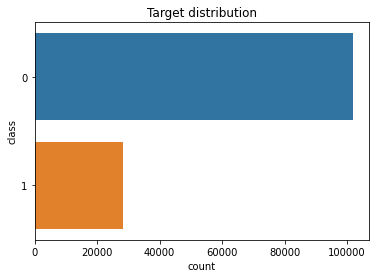

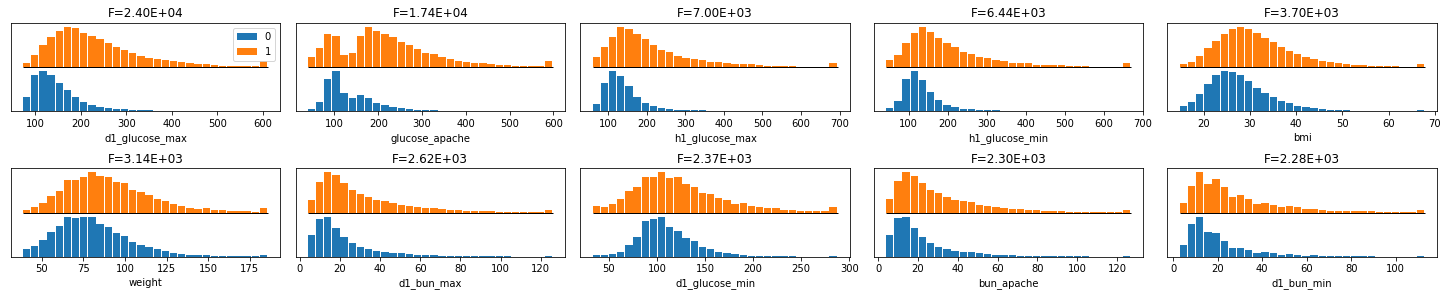

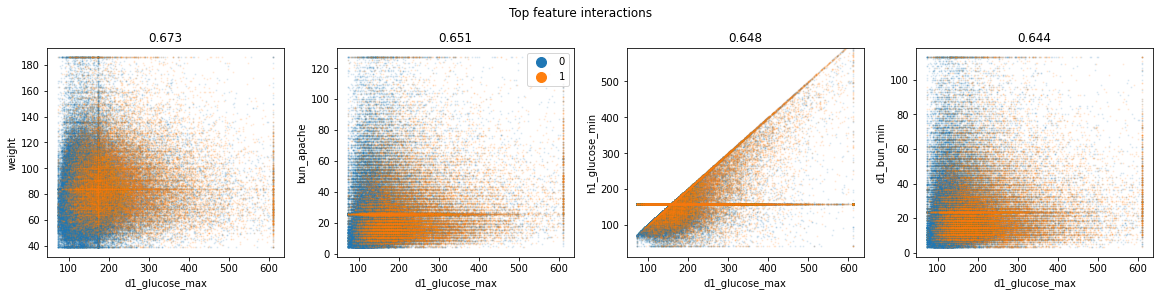

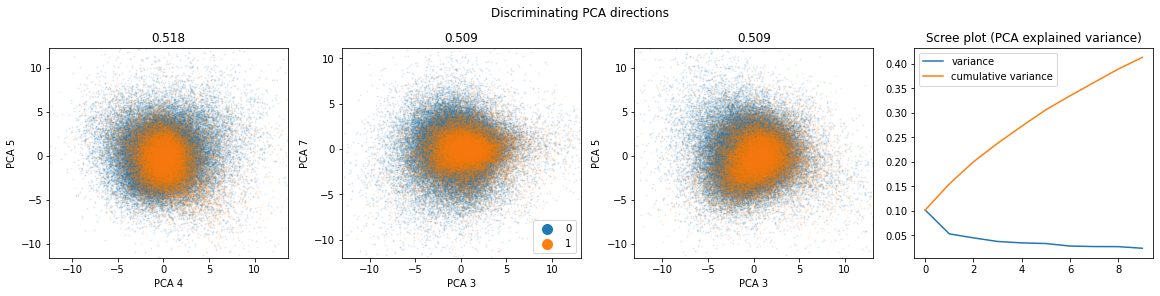

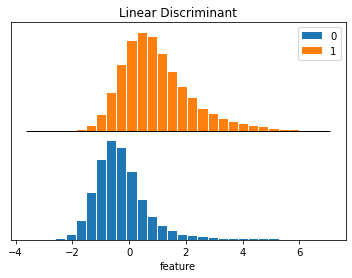

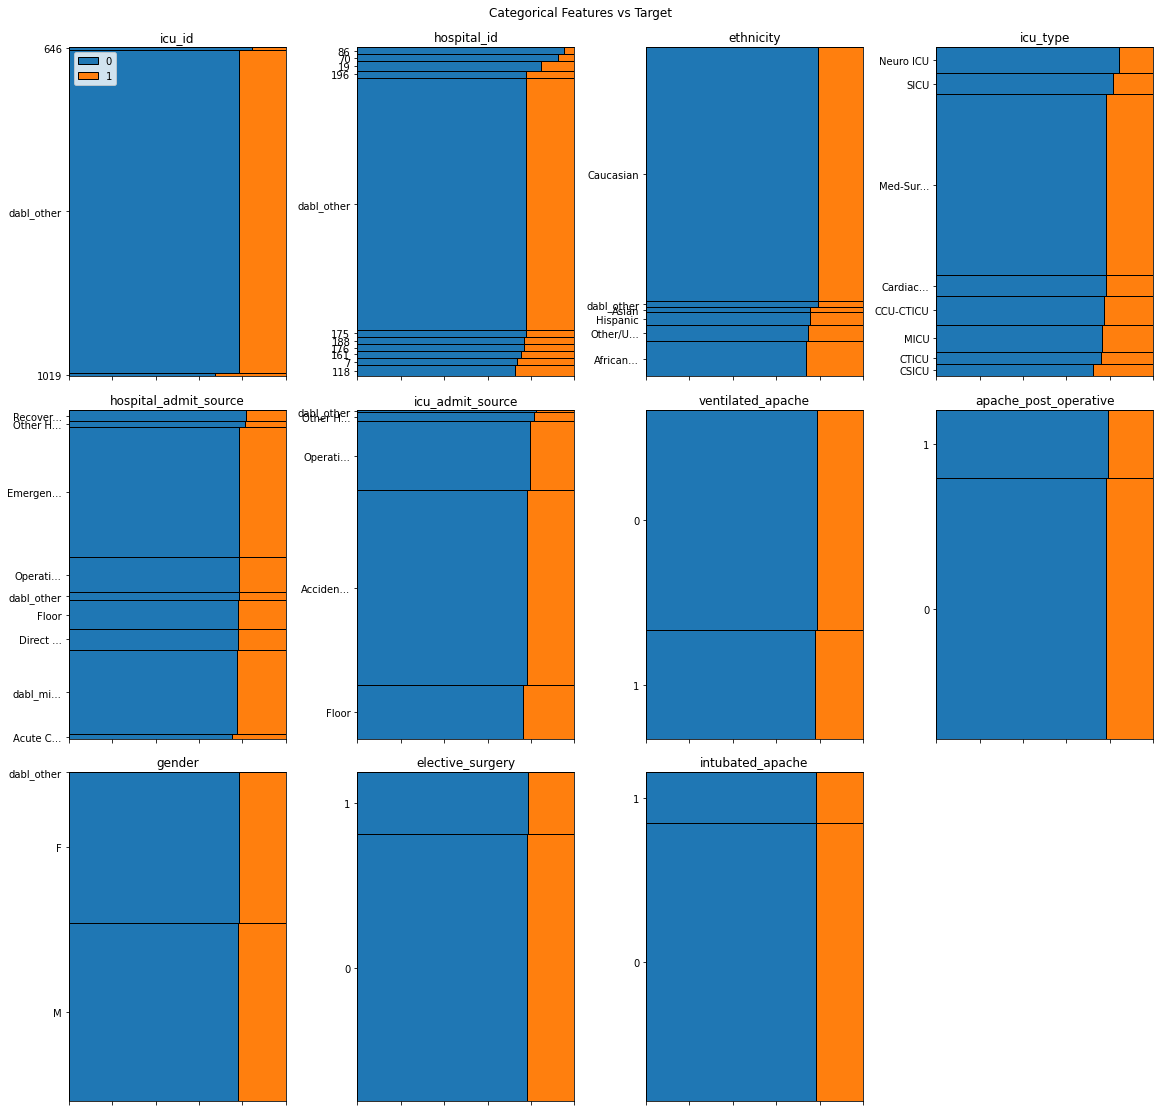

In [8]:
db.plot(train_data, 'diabetes_mellitus')

####Data checking

In [9]:
col_train =  train_data.columns
col_train = pd.DataFrame(col_train)
col_train

,0
0,Unnamed: 0
1,encounter_id
2,hospital_id
3,age
4,bmi
...,...
176,immunosuppression
177,leukemia
178,lymphoma
179,solid_tumor_with_metastasis


In [13]:
missing_value=train_data.isnull().sum()
missing= missing_value[missing_value>0]
missing = pd.DataFrame({"Number of Missing Values" : missing})
missing.head()

,Number of Missing Values
age,4988
bmi,4490
ethnicity,1587
gender,66
height,2077


In [14]:
# Lets visualised the null present through graph and processing
numof_null_cols = train_data.columns[train_data.isnull().any()].tolist()
print(numof_null_cols)
print("total null colums : ", len(numof_null_cols))
cols_1 = numof_null_cols[:19]
cols_2 = numof_null_cols[19:38]
cols_3 = numof_null_cols[38:57]
cols_4 = numof_null_cols[57:76]
cols_5 = numof_null_cols[76:95]
cols_6 = numof_null_cols[95:114]
cols_7 = numof_null_cols[114:133]
cols_8= numof_null_cols[133:160]
col_mean  = []
col_median = []


['age', 'bmi', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_m

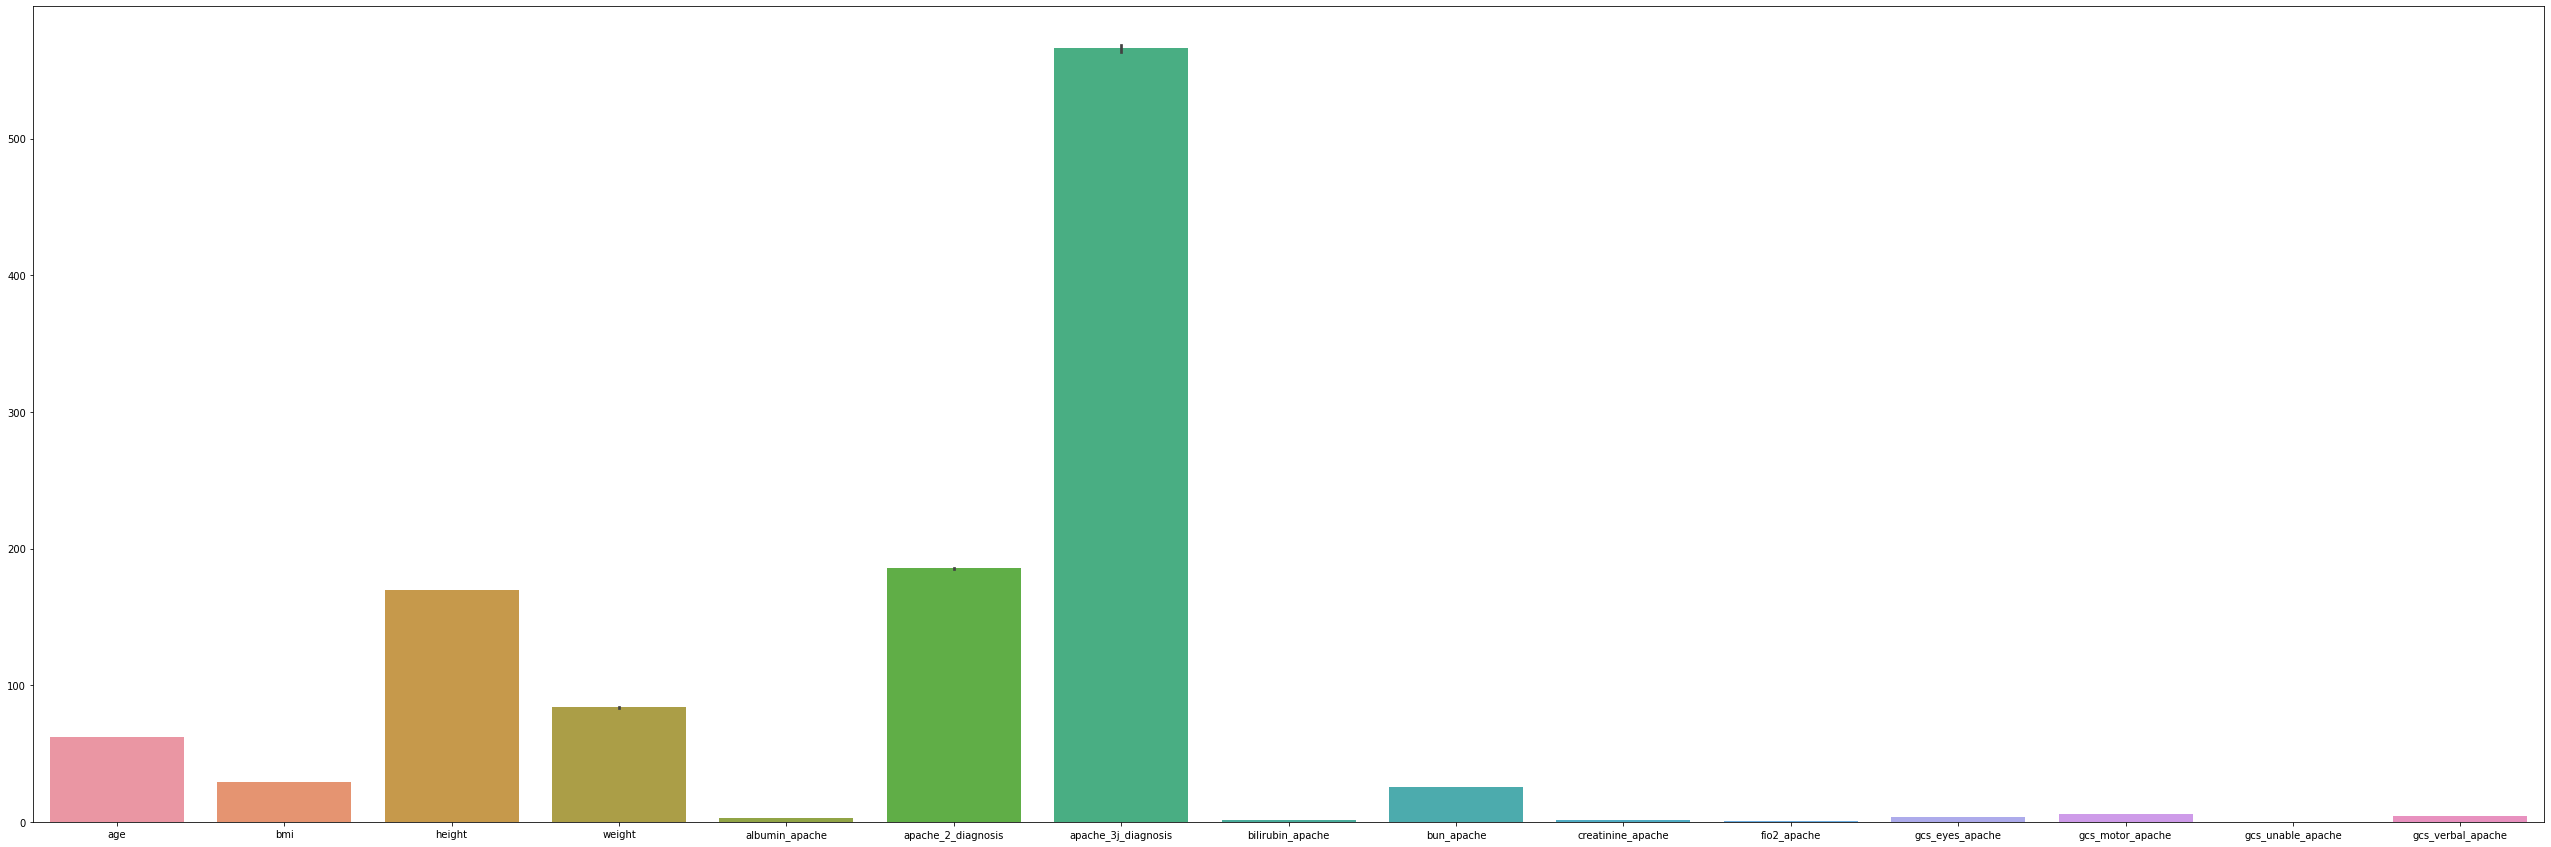

******************************************************************************************************************************************************


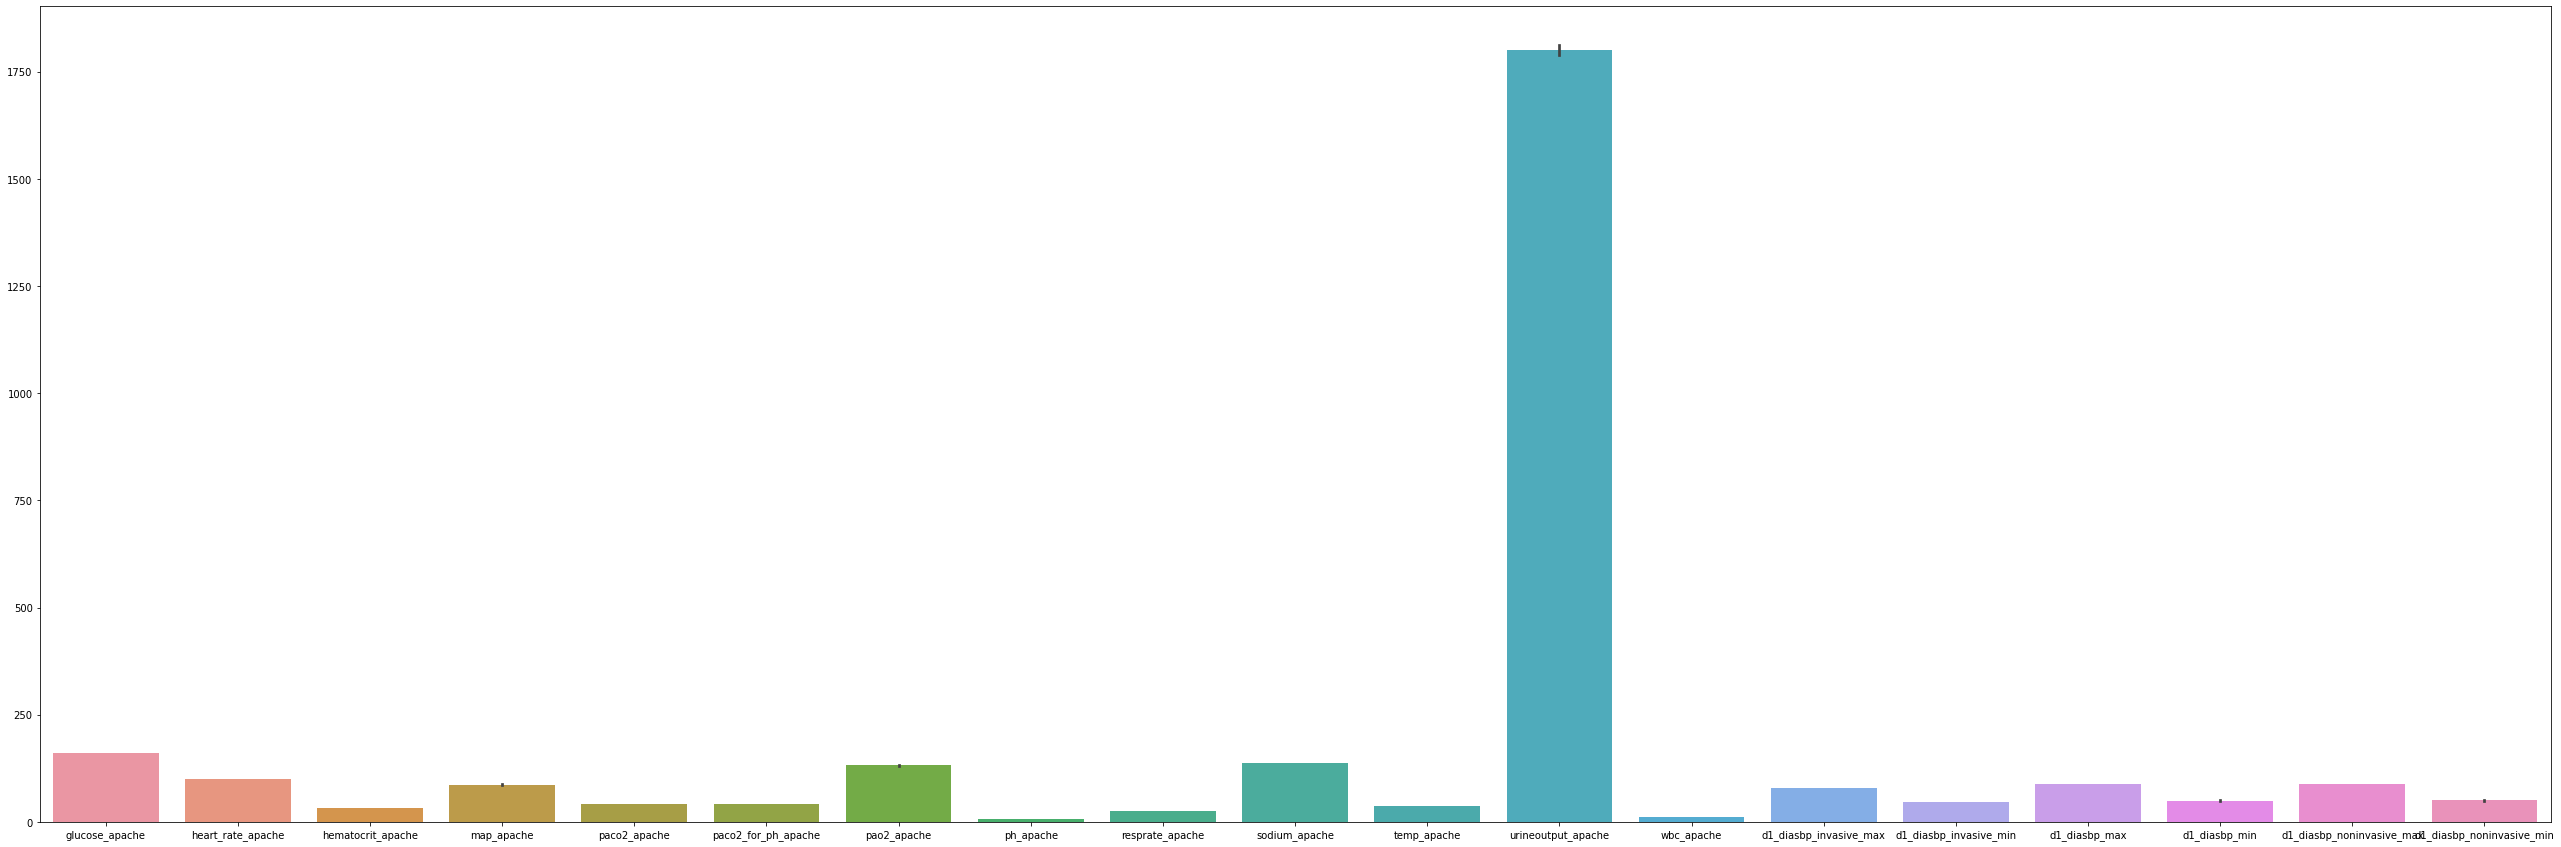

******************************************************************************************************************************************************


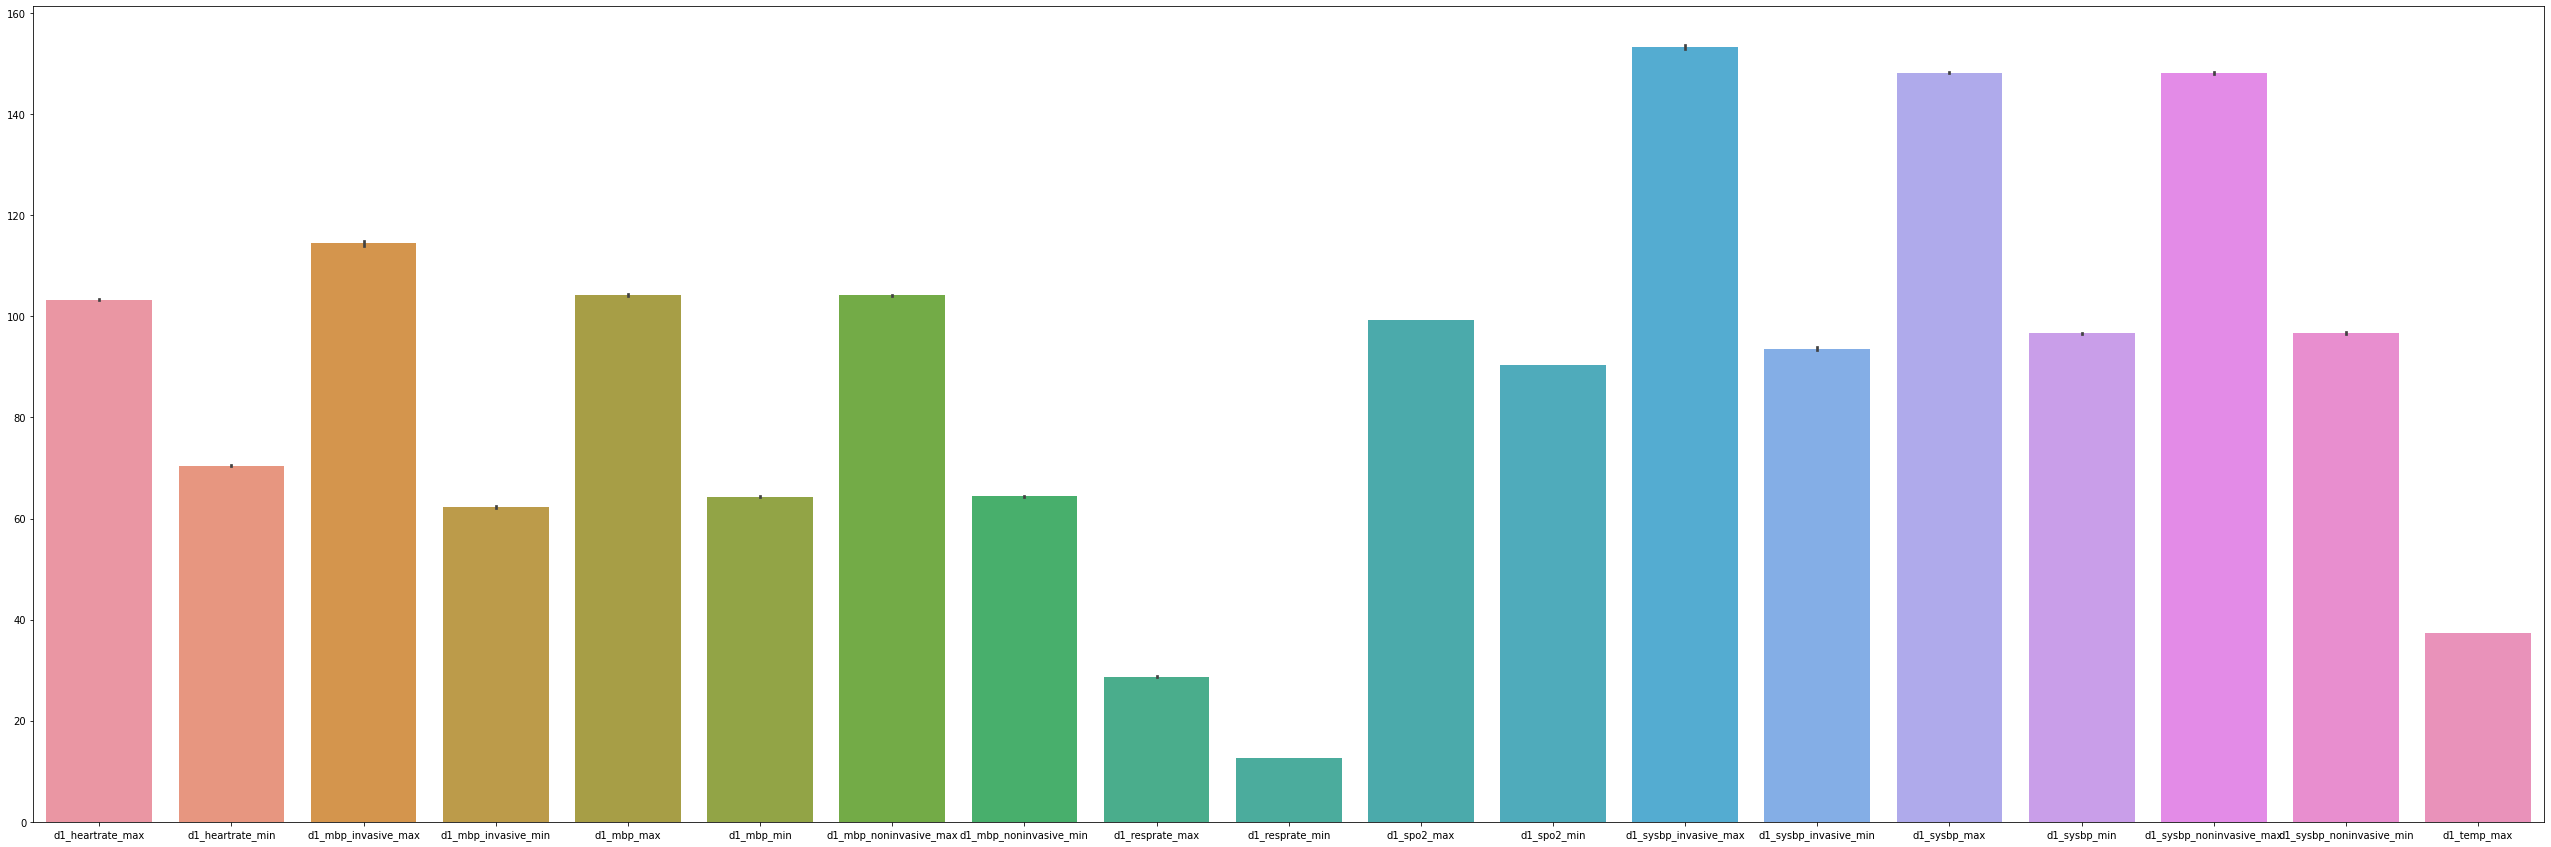

In [15]:
## lets visualized some part of null columns
plt.figure(figsize=(45,15))
sns.barplot(data=train_data[cols_1])
plt.show()
print("*"*150)
plt.figure(figsize=(45,15))
sns.barplot(data=train_data[cols_2])
plt.show()
print("*"*150)
plt.figure(figsize=(45,15))
sns.barplot(data=train_data[cols_3])
plt.show()

In [16]:
train_data[cols_1].describe().T   #

,count,mean,std,min,25%,50%,75%,max
age,125169.0,61.995103,16.822880,0.000000,52.000000,64.000000,75.000000,89.00000
bmi,125667.0,29.110260,8.262776,14.844926,23.598006,27.564749,32.803127,67.81499
height,128080.0,169.607219,10.833085,137.200000,162.500000,170.100000,177.800000,195.59000
weight,126694.0,83.791104,24.963063,38.600000,66.500000,80.000000,96.800000,186.00000
albumin_apache,51994.0,2.886149,0.689812,1.200000,2.400000,2.900000,3.400000,4.60000
apache_2_diagnosis,128472.0,185.492683,85.858208,101.000000,113.000000,122.000000,301.000000,308.00000
apache_3j_diagnosis,129292.0,565.994296,466.510850,0.010000,204.010000,409.020000,703.030000,2201.05000
bilirubin_apache,47597.0,1.201222,2.351994,0.100000,0.400000,0.700000,1.100000,60.20000
bun_apache,104746.0,25.718070,20.690041,4.000000,13.000000,19.000000,31.000000,127.00000
creatinine_apache,105275.0,1.481629,1.543535,0.300000,0.710000,0.970000,1.530000,11.18000


In [17]:
pd.DataFrame(train_data.isnull().sum().sort_values(ascending=False), columns = ["Values Missing"])
##sort_values() ## we can h_bilirubin_max col has highest missing values

,Values Missing
h1_bilirubin_max,119861
h1_bilirubin_min,119861
h1_albumin_max,119005
h1_albumin_min,119005
h1_lactate_min,118467
...,...
icu_stay_type,0
icu_id,0
elective_surgery,0
hospital_id,0


In [18]:
### checking the number of col which has dtype as "object"
object_col = train_data.select_dtypes('object').columns
object_col , len(object_col)  #as we can see there are total of 6 col 

(Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
        'icu_stay_type', 'icu_type'],
       dtype='object'), 6)

In [19]:
##now we can check the information regarding those object columns
train_data[object_col].describe().T ## After print (we can notice there are multiclass observed through the Unique values )

,count,unique,top,freq
ethnicity,128570,6,Caucasian,100236
gender,130091,2,M,70518
hospital_admit_source,96959,15,Emergency Department,51258
icu_admit_source,129917,5,Accident & Emergency,76846
icu_stay_type,130157,3,admit,124741
icu_type,130157,8,Med-Surg ICU,71468


In [20]:
#we can check the null values present in the those data
null_object = train_data[object_col].isnull().sum()
null_object ## there are some missing values present

ethnicity                 1587
gender                      66
hospital_admit_source    33198
icu_admit_source           240
icu_stay_type                0
icu_type                     0
dtype: int64

In [21]:
##Dropping of data ## has to impliment ond test data as well for equal dimension 
train_data=train_data.drop_duplicates() ##Dropping duplicated if present any
test_data = test_data.drop_duplicates()
print(train_data.shape)
print(test_data.shape)

(130157, 181)
(10234, 180)


In [22]:
##Now dropping data column which has more than 90% or 80% missing values
cols_90 = train_data.columns[round(train_data.isnull().sum()/len(train_data.index)*100,2) > 90].tolist()
cols_80 = train_data.columns[round(train_data.isnull().sum()/len(train_data.index)*100,2)>80].tolist()
len(cols_90),len(cols_80) ## hence there are total of 6 column which has 90% data missiong and 32 column which has 80% data missing 

(6, 32)

In [23]:
train_data = train_data.drop(cols_90,axis=1)
test_data = test_data.drop(cols_90,axis = 1)
train_data.shape,test_data.shape ## as noticed shape of the both dataset is reduced by colum from 181 to 175 (6 column dropped which has 90% mission values)

((130157, 175), (10234, 174))

In [24]:
object_col ### we can drop some object types column which does not affect the result or output 

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type'],
      dtype='object')

In [25]:
train_data = train_data.drop(['hospital_admit_source', 'icu_admit_source','icu_stay_type', 'icu_type'], axis = 1)
test_data = test_data.drop(['hospital_admit_source', 'icu_admit_source','icu_stay_type', 'icu_type'], axis = 1)
object_col = object_col.drop(['hospital_admit_source', 'icu_admit_source','icu_stay_type', 'icu_type'])
train_data.shape,test_data.shape ## 4 column dropped

((130157, 171), (10234, 170))

In [26]:
train_data['gender'].fillna(value =train_data['gender'].mode()[0], inplace =True)
train_data['gender'].value_counts()

M    70584
F    59573
Name: gender, dtype: int64

In [27]:
train_data['ethnicity'].fillna(value =train_data['ethnicity'].mode()[0], inplace =True)
train_data['ethnicity'].value_counts()   #### FILLING MISSING VALUES

Caucasian           101823
African American     13911
Other/Unknown         6261
Hispanic              5049
Asian                 2198
Native American        915
Name: ethnicity, dtype: int64

In [28]:
### has to do with test data as well
test_data['gender'].fillna(value =test_data['gender'].mode()[0], inplace =True)
test_data['ethnicity'].fillna(value =test_data['ethnicity'].mode()[0], inplace =True)

In [29]:
#checking the shape of both data
train_data.shape,test_data.shape

((130157, 171), (10234, 170))

In [30]:
## also dropping some other column which does not affect the result
train_data = train_data.drop(['Unnamed: 0','hospital_id','icu_id','pre_icu_los_days','readmission_status'],axis=1)
test_data = test_data.drop(['Unnamed: 0','hospital_id','icu_id','pre_icu_los_days','readmission_status'],axis=1)
train_data.shape, test_data.shape

((130157, 166), (10234, 165))

In [31]:
### FILLING  bmi,age,weight , height with mean values 

train_data['bmi'].fillna(value = train_data['bmi'].mean(), inplace=True)
train_data['age'].fillna(value = train_data['age'].mean(), inplace=True)
train_data['weight'].fillna(value = train_data['weight'].mean(), inplace=True)
train_data['height'].fillna(value = train_data['height'].mean(), inplace=True)


test_data['bmi'].fillna(value = test_data['bmi'].mean(), inplace=True)
test_data['age'].fillna(value = test_data['age'].mean(), inplace=True)
test_data['weight'].fillna(value = test_data['weight'].mean(), inplace=True)
test_data['height'].fillna(value = test_data['height'].mean(), inplace=True)


In [32]:
train_data.isnull().sum()

encounter_id                   0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
                              ..
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
diabetes_mellitus              0
Length: 166, dtype: int64

In [33]:
enc = LabelEncoder()
for b in object_col:
  train_data[b] = enc.fit_transform(train_data[b].astype(str))
  test_data[b] = enc.fit_transform(test_data[b].astype(str))


In [34]:
X = train_data.drop("diabetes_mellitus" , axis=1)
y = train_data.pop("diabetes_mellitus")

In [35]:
X= X.fillna(train_data.median())
X.isnull().sum()

encounter_id                   0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
                              ..
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
Length: 165, dtype: int64

In [36]:
test_data = test_data.fillna(test_data.median())
test_data.isnull().sum()

encounter_id                   0
age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
                              ..
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
Length: 165, dtype: int64

In [37]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,130157.0,213000.856519,38109.828146,147000.000000,180001.000000,213014.000000,246002.000000,279000.00000
age,130157.0,61.995103,16.497377,0.000000,53.000000,63.000000,74.000000,89.00000
bmi,130157.0,29.110260,8.119004,14.844926,23.737886,27.900747,32.546205,67.81499
elective_surgery,130157.0,0.189840,0.392176,0.000000,0.000000,0.000000,0.000000,1.00000
ethnicity,130157.0,1.966517,0.971149,0.000000,2.000000,2.000000,2.000000,5.00000
...,...,...,...,...,...,...,...,...
hepatic_failure,130157.0,0.013599,0.115819,0.000000,0.000000,0.000000,0.000000,1.00000
immunosuppression,130157.0,0.025669,0.158146,0.000000,0.000000,0.000000,0.000000,1.00000
leukemia,130157.0,0.007307,0.085166,0.000000,0.000000,0.000000,0.000000,1.00000
lymphoma,130157.0,0.004187,0.064574,0.000000,0.000000,0.000000,0.000000,1.00000


In [38]:
X.head()

,encounter_id,age,bmi,elective_surgery,ethnicity,gender,height,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,214826,68.0,22.732803,0,2,1,180.3,73.900000,2.3,113.0,502.01,0,0,0.4,31.0,2.51,0.5,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,40.0,40.0,104.0,7.36,36.0,134.0,39.3,1454.976,0,14.10,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,67.0,55.0,68.0,63.0,68.0,63.0,119.0,108.0,90.0,74.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,136.0,112.0,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,1.3,1.2,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,18.0,18.0,8.3,8.3,1.01,1.01,140.0,134.0,23.0,23.0,11.2,11.1,33.7,33.3,1.3,1.2,179.0,179.0,4.1,4.1,139.0,138.0,12.1,12.1,42.9,37.0,7.39,7.34,127.0,85.0,275.0,205.000000,42.0,41.0,7.35,7.34,119.9,108.0,228.125,218.75,0,0,0,0,0,0,0
1,246060,77.0,27.421875,0,2,0,160.0,70.200000,2.9,108.0,203.01,0,0,0.7,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,1454.976,1,12.70,76.0,46.0,95.0,31.0,95.0,31.0,118.0,72.0,101.0,62.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,150.0,92.0,159.0,67.0,159.0,67.0,36.3,35.1,67.0,55.0,61.0,48.0,61.0,48.0,114.0,100.0,90.0,74.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,136.0,112.0,95.0,71.0,95.0,71.0,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26

In [39]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: diabetes_mellitus, dtype: int64

In [40]:
col_for_CM = X.columns

In [41]:
## Lets split data into training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=.30, random_state=1)

In [42]:
dtree_model  = tree.DecisionTreeClassifier(criterion='gini',max_depth = 1000, min_samples_leaf = 2500,min_samples_split = 5000)

In [43]:
dtree_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=1000, min_samples_leaf=2500,
                       min_samples_split=5000)

In [44]:
Y_hat = dtree_model.predict(X_val)

In [45]:
accuracy_score(Y_hat,Y_val)

0.8103103872157345

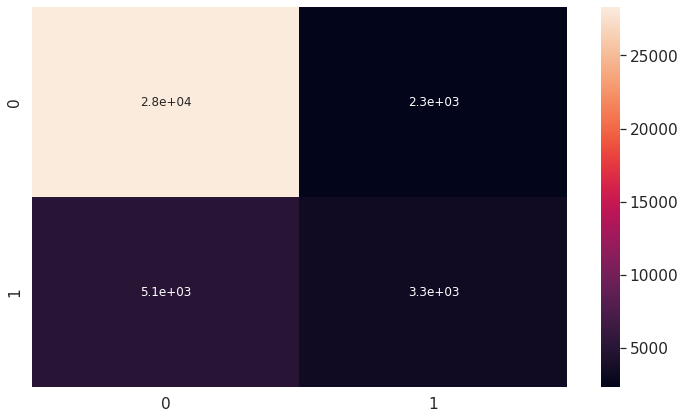

In [46]:
cm = confusion_matrix(Y_val, Y_hat)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (12,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

In [47]:
### NOW LETS DO THE PREDICTION OF UNLABLED DATA

Y_pred = dtree_model.predict(test_data)

In [48]:
Y_pred_frame = pd.DataFrame({"diabetes_mellitus" : Y_pred})

In [49]:

diabetes_prediction = pd.concat([test_data['encounter_id'].reset_index(drop=True),Y_pred_frame],axis = 1)
diabetes_prediction.head()


,encounter_id,diabetes_mellitus
0,144740,0
1,141990,0
2,142038,0
3,138628,0
4,141682,0
